<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/Modeling_Prediction_Class_mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library
Import pustaka yang diperlukan, termasuk pandas, scikit-learn, dan matplotlib.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


##Muat Data
Muat data dari file CSV "mnist_test.csv" ke dalam DataFrame pandas.

In [18]:
data = pd.read_csv("mnist_test.csv")


##Eksplorasi Data
Lakukan eksplorasi data untuk memahami karakteristiknya seperti tipe data, statistik deskriptif, dan visualisasi jika diperlukan.

In [19]:
print(data.head())
print(data.describe())


   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
                 7       0     0.1     0.2     0.3     0.4     0.5     0.6  \
count  9999.000000  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0   
mean      4.443144     0.0     0.0     

##Persiapan Data
Persiapkan data untuk pelatihan model. Ini termasuk pemilihan fitur (pixel), pembagian data menjadi data pelatihan dan pengujian, dan penskalaan data jika diperlukan.

In [20]:
# Periksa nama kolom pertama
print(data.columns[0])

7


In [21]:
# Pilih fitur (pixel) dan target (label)
X = data.drop(data.columns[0], axis=1)
y = data[data.columns[0]]

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
pip install --upgrade pandas


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Pembuatan Model
Buat model klasifikasi, seperti Random Forest Classifier.

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##Evaluasi Model
Evaluasi kinerja model dengan menghitung akurasi dan melihat laporan klasifikasi serta matriks kebingungan.

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.9465
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       205
           1       0.96      1.00      0.98       218
           2       0.92      0.92      0.92       192
           3       0.92      0.93      0.92       201
           4       0.95      0.94      0.94       205
           5       0.95      0.93      0.94       198
           6       0.94      0.96      0.95       186
           7       0.96      0.95      0.95       193
           8       0.95      0.92      0.93       191
           9       0.96      0.94      0.95       211

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Confusion Matrix:
[[201   0   1   0   0   1   1   0   1   0]
 [  0 217   1   0   0   0   0   0   0   0]
 [  2   0 177   2   3   1   2   3   2   0]
 [  0   0   5 186   0   4   0   4   2   0]
 [  2   0  

##Visualisasi Hasil (Opsional)
Jika diperlukan, Anda dapat membuat visualisasi hasil, seperti menampilkan beberapa gambar dari data pengujian dan label prediksi.

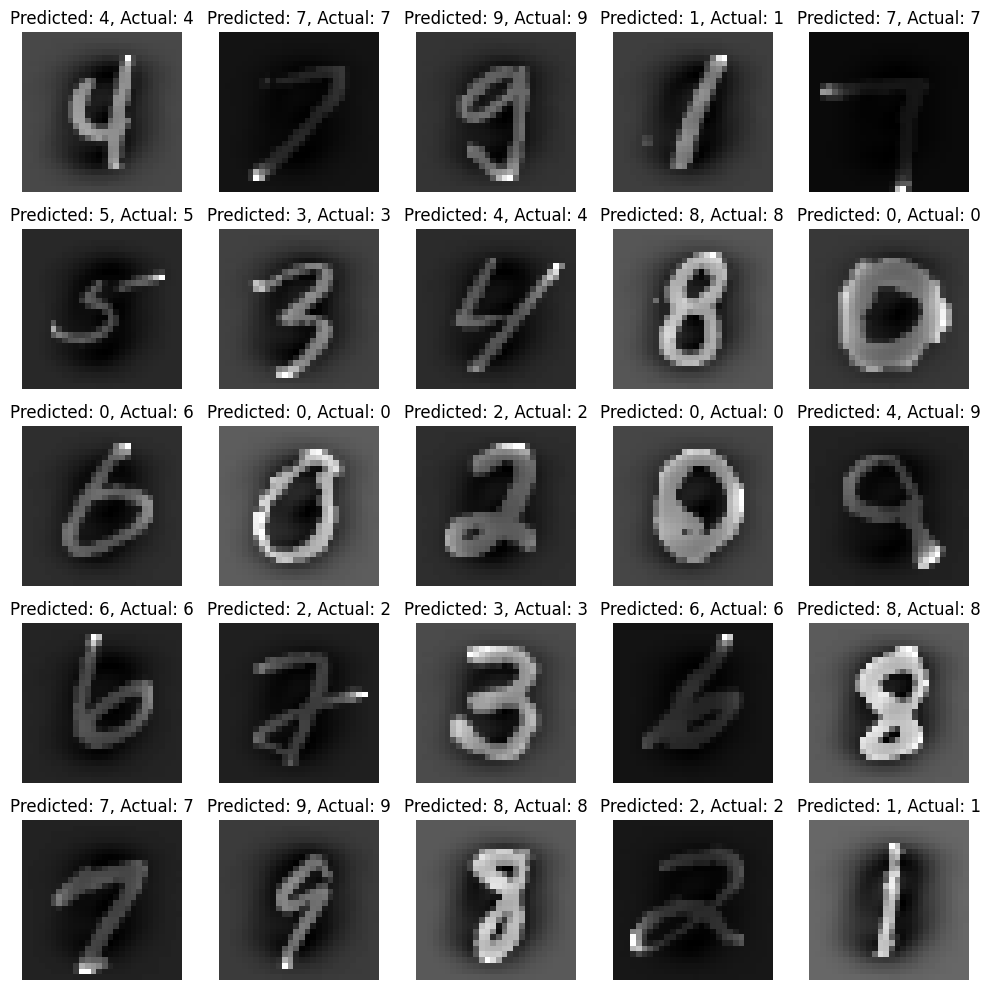

In [29]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {y_pred[i]}, Actual: {y_test.values[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()
